Link to presentation 

https://docs.google.com/presentation/d/1vaS3wJFI8vMAP5tPqedyfvqHplxnc3Yyxrbcy01B-Zo/edit?usp=sharing 

## overview 
This project is based on analyzing a data base from a callcenter. 
Target of the analysis: the callcenter owners and managers. 
Objective: We want to learn which operators have a low performance. 
Delivery: an analysis of low performers, with an extension on how to define them and any information relevant to the case. 

The dataset has the information on the client that made the call, the operator that answered (identified by their operator_id) and other relevant data such as if the called was amissed call, the duration of the calls, and the wait times. 

Based on the objective we need to find the operators that have a low performance. For that part we need to define how we are measuring performance, what is the values that we are taking into account, and what are the thresholds for them. Then  we can create a tag of high performer vs low performer. Once we have a dataset of low performer and high performers we can start to compare them so we can see if there is any pattern present in the low performers, or the high performers. 
Afterwards we will formulate hypothesis based on those patterns, and test them. The hypothesis must be tested because there can be false associations between the data and we want to pinpoint the reasons for the low performers. 

Pre analysis information. 

We know that performance is based on the number of lost incoming calls, the wait times for the incoming calls, and the number of outgoing calls. 




## Steps

IN order to do this we are going to do the following steps 

1. Pre procesing of the data
2. Pre analysis of the data
2. Check for low performing operators
3. Check patterns in the low performing operators
4. Do hypothesis analysis for the low performing operators 


## 1. Pre procesing  of the data

We will check the data base, see if there is any null values or repeated values. in the data provided all columns are useful so we will try to keep them all. 
In this step we are going to clean the data, check for data types if needed and make some assumptions for future tests.
At the end of this step we will have a cleaned data set that we can work with. 


## 2. Pre analysis   of the data

In this step we will check for average for each value in the columns, see if there are any correlations between them. Count the values and graph the overall behaviour of the operators, such as wait times, number of incoming calls, number of outgoing calls, if the calls are external or internal. We will check 

The information from the pre analyzis will help streamline the check for the low performing operators. 

## 3. Check for low performing operators 

We will check which operators are having a low performance. Low performance is defined by the next data

    1.High number of lost incoming  calls.
    We will evaluate by grouping the number of incoming calls in quartiles, the operators that fall on the Q1 will be defined as low performers. If the number is very high we will increase the number of quantiles. 
    2.Large wait times for incoming calls.
    We will check the wait times for incoming calls and separate them in quartiles, once again any operator in the Q1 will be defined as low performer. 
    3.if they need to make outgoing calls, a low number is also an indicator for this
    We will match the number of outgoing calls in order to check for the low performers. 
    
An important point is that an operator can fall into any of the above three categories. Depending on the preanalysis of the data we will check for the relevance of each and weight them against each other. Number 1 and 2 are the most important Measurment but the presence of 3 works to define an off case vs a low performer. 

Once we have the low performers for each value checked we will standarize them and create a tag on the dataset for them. 
IN this step we wil check for the thresholds for each value in order to avoid inconclusive data. We will graph the behaviours and check for the outliers in a normal curve 


## 4. Check patterns in the low performin operators 
Once we have isolated the low performing operators we will analyze the subset and compare it to the rest of the columns. 
In this step we want to check for patterns in the data, check fi there is any correlation between the values and the behaviour of the low performers. 
We will graph those patterns and generate hypothesis for the next step 

We have extra information besides the number of calls. Once we have defined three  groups, A- High performers (Q4), B- normal performers (Q2,Q3) and C- Low performers (Q1) we can compare them on the other metrics. Some examples of the possible correlations 

Time: We can check to see if the low performers are always attending at certain times of the day, this could indicate an issue with managment or the timeshift themselves( for example overnight shifts) 
Number of outgoing and incoming calls: We can check if the low performers have an abnormal number of outgoing calls or incoming calls compared to the rest. This could indicate that their performance is tied to certain values or conditions. 
Clients: We can check to see if the low performers are tied to specific clients accounts, this could indicate that those are problematic clients. 
Client start date and plan : similar to the client correlation above, we can see if the low performers are related to when did the client start the plan, or even the type of plan itself. If the low performers are related to a specific plan it could indicate issues on the plan. 

## 5. Hypothesis testing 

Once we have some patterns pin down on the data we will check on the hypothesis to compare them. The hypothesis wil allow us to see if the correlations are true and if they are relevant to the data for the client.  

In [37]:
from scipy import stats as st
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import math
import seaborn as sns
from scipy.stats import chi2_contingency 
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway 

In [38]:
#import data sets
try:
    # Try the first path
    telecomClientRaw = pd.read_csv('/datasets/telecom_clients_us.csv')
    telecomCallRaw =  pd.read_csv('/datasets/telecom_dataset_us.csv')
    
except FileNotFoundError:
    try:
        # Try the second path if the first one fails
        telecomClientRaw = pd.read_csv('telecom_clients_us.csv')
        telecomCallRaw =  pd.read_csv('telecom_dataset_us.csv')
    except FileNotFoundError:
        print("File not found in both locations.")

In [39]:
# initial visualization 
telecomClientRaw.info(show_counts = True)
display (telecomClientRaw.sample(10))

telecomCallRaw.info(show_counts = True)
display (telecomCallRaw.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
430,166900,C,2019-08-23
311,167272,C,2019-09-10
246,167630,C,2019-09-24
101,166546,C,2019-08-08
379,166497,C,2019-08-06
431,167446,C,2019-09-17
653,166663,B,2019-08-13
106,168186,C,2019-10-16
474,168103,B,2019-10-14
67,166681,A,2019-08-14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
32030,167445,2019-11-23 00:00:00+03:00,out,False,920726.0,True,1,0,2
51266,168271,2019-11-23 00:00:00+03:00,in,False,944764.0,False,25,1705,1851
52031,168361,2019-10-27 00:00:00+03:00,out,False,945284.0,True,36,0,801
38994,167654,2019-11-22 00:00:00+03:00,in,False,918978.0,False,39,4576,4945
33419,167497,2019-10-07 00:00:00+03:00,in,False,NaN,True,3,0,112
11686,166708,2019-10-07 00:00:00+03:00,out,False,899082.0,False,13,551,750
6124,166541,2019-09-13 00:00:00+03:00,out,False,908958.0,False,1,100,113
32417,167466,2019-10-22 00:00:00+03:00,out,False,921818.0,False,37,1248,1817
47305,168187,2019-10-21 00:00:00+03:00,out,False,937810.0,True,13,0,447
16630,166916,2019-10-25 00:00:00+03:00,in,False,906408.0,False,8,1269,1500


From the data we can now say the following information
The events are only kept up to the day so we can't use the hours to check for relationships, the operator_id is also marking missed calls when no one takes it, and calls_count is not clear what is checking. 

In [40]:
#there are some columns with null values, 
#now operator_id is related to missed_calls so we are going to keep the raw file to come back to it later 
columns_to_clean = ['internal']

# Drop rows with null values in the specified columns
telecomCallClean = telecomCallRaw.dropna(subset=columns_to_clean)
#then we transform to datetime 
telecomCallClean['date'] = pd.to_datetime(telecomCallClean['date'])
# we also have operator_id which is a unique identifier as a float, since that lead to some mistakes we are turning it into str
telecomCallClean['operator_id'] = telecomCallClean['operator_id'] .astype(str)

telecomClientRaw['date_start'] = pd.to_datetime(telecomClientRaw['date_start'])
telecomCallClean.info(show_counts = True)
display (telecomCallClean.sample(10))
display (telecomClientRaw.sample(10))

<class 'pandas.core.frame.DataFrame'>
Index: 53785 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53785 non-null  int64                    
 1   date                 53785 non-null  datetime64[ns, UTC+03:00]
 2   direction            53785 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          53785 non-null  object                   
 5   is_missed_call       53785 non-null  bool                     
 6   calls_count          53785 non-null  int64                    
 7   call_duration        53785 non-null  int64                    
 8   total_call_duration  53785 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), int64(4), object(3)
memory usage: 3.7+ MB


C:\Users\aguzm\AppData\Local\Temp\ipykernel_39776\288499615.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecomCallClean['date'] = pd.to_datetime(telecomCallClean['date'])
C:\Users\aguzm\AppData\Local\Temp\ipykernel_39776\288499615.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecomCallClean['operator_id'] = telecomCallClean['operator_id'] .astype(str)


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
25517,167141,2019-09-14 00:00:00+03:00,in,False,nan,True,12,0,31
2614,166407,2019-11-14 00:00:00+03:00,out,True,888534.0,False,4,56,90
49436,168187,2019-11-26 00:00:00+03:00,out,True,937984.0,False,2,194,208
32617,167471,2019-10-30 00:00:00+03:00,out,False,944646.0,True,1,0,0
34034,167497,2019-11-06 00:00:00+03:00,in,False,924928.0,False,1,335,346
21509,167035,2019-10-17 00:00:00+03:00,out,False,923528.0,False,10,181,304
25463,167130,2019-09-04 00:00:00+03:00,in,True,nan,True,2,0,19
23184,167078,2019-11-13 00:00:00+03:00,out,False,900592.0,False,3,102,130
11624,166708,2019-09-20 00:00:00+03:00,out,False,899082.0,False,9,266,382
6125,166541,2019-09-13 00:00:00+03:00,in,False,910958.0,False,2,201,275


,user_id,tariff_plan,date_start
161,168206,C,2019-10-16
72,167662,A,2019-09-24
641,166774,B,2019-08-19
276,167683,C,2019-09-25
101,166546,C,2019-08-08
49,166725,A,2019-08-16
706,167981,B,2019-10-08
196,168073,C,2019-10-11
655,166658,B,2019-08-13
473,167061,B,2019-08-29


In [41]:
telecomCallClean['waited_time']=telecomCallClean['total_call_duration']-telecomCallClean['call_duration']
display (telecomCallClean.info())
columnsToWork = ['call_duration', 'total_call_duration', 'waited_time', 'calls_count']
#since we are going to work comparing to the user_id we are going to merge them in this step 

telecomCallClean = pd.merge(telecomCallClean, telecomClientRaw, on='user_id', how='inner')
display (telecomCallClean)

<class 'pandas.core.frame.DataFrame'>
Index: 53785 entries, 0 to 53901
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53785 non-null  int64                    
 1   date                 53785 non-null  datetime64[ns, UTC+03:00]
 2   direction            53785 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          53785 non-null  object                   
 5   is_missed_call       53785 non-null  bool                     
 6   calls_count          53785 non-null  int64                    
 7   call_duration        53785 non-null  int64                    
 8   total_call_duration  53785 non-null  int64                    
 9   waited_time          53785 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), int64(5), object(3)
memory usage:

C:\Users\aguzm\AppData\Local\Temp\ipykernel_39776\4289601251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecomCallClean['waited_time']=telecomCallClean['total_call_duration']-telecomCallClean['call_duration']


None

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waited_time,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,nan,True,2,0,4,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,8,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
53780,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38,38,C,2019-10-31
53781,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501,22,C,2019-10-31
53782,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,60,C,2019-10-31
53783,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,60,C,2019-10-31


## pre analysis 

The data has over 53,000 points, there is some missing values in operator id but those are beaause the call was missed by any operator so we are keeping those data at the moment. 
We also have the date of the call, but we don't have the hours so a time of call analysis is not going to be possible. 

In [42]:
#we use describe to have quickly the information 
def quickStatistics(df,columnsToWork):
    for i in columnsToWork:
        display(i)
        display(df[i].describe())
    

In [43]:
quickStatistics(telecomCallClean,columnsToWork)

'call_duration'

count     53785.000000
mean        868.436162
std        3735.653323
min           0.000000
25%           0.000000
50%          38.000000
75%         574.000000
max      144395.000000
Name: call_duration, dtype: float64

'total_call_duration'

count     53785.000000
mean       1159.476174
std        4407.963966
min           0.000000
25%          47.000000
50%         211.000000
75%         905.000000
max      166155.000000
Name: total_call_duration, dtype: float64

'waited_time'

count    53785.000000
mean       291.040011
std       1129.059868
min          0.000000
25%         17.000000
50%         55.000000
75%        202.000000
max      46474.000000
Name: waited_time, dtype: float64

'calls_count'

count    53785.000000
mean        16.482681
std         62.981680
min          1.000000
25%          1.000000
50%          4.000000
75%         12.000000
max       4817.000000
Name: calls_count, dtype: float64

In [44]:
display(telecomCallClean['date'].max())
display(telecomCallClean['date'].min())

Timestamp('2019-11-28 00:00:00+0300', tz='UTC+03:00')

Timestamp('2019-08-02 00:00:00+0300', tz='UTC+03:00')

We have some data that is on the extremes such as a call duration of 144395 seconds while the average is 1010 seconds. 
We also know that the data goes from 2 of august to 28 of november. 


In [45]:
#function to graph the data to visualize the patterns. 
def histogramsColumn(df,columnsToWork,bins):

    # Create histograms for each column
    plt.figure(figsize=(15, 10))

    for i, column in enumerate(columnsToWork, 1):
        plt.subplot(2, 2, i)
        plt.hist(df[column], bins=bins, edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

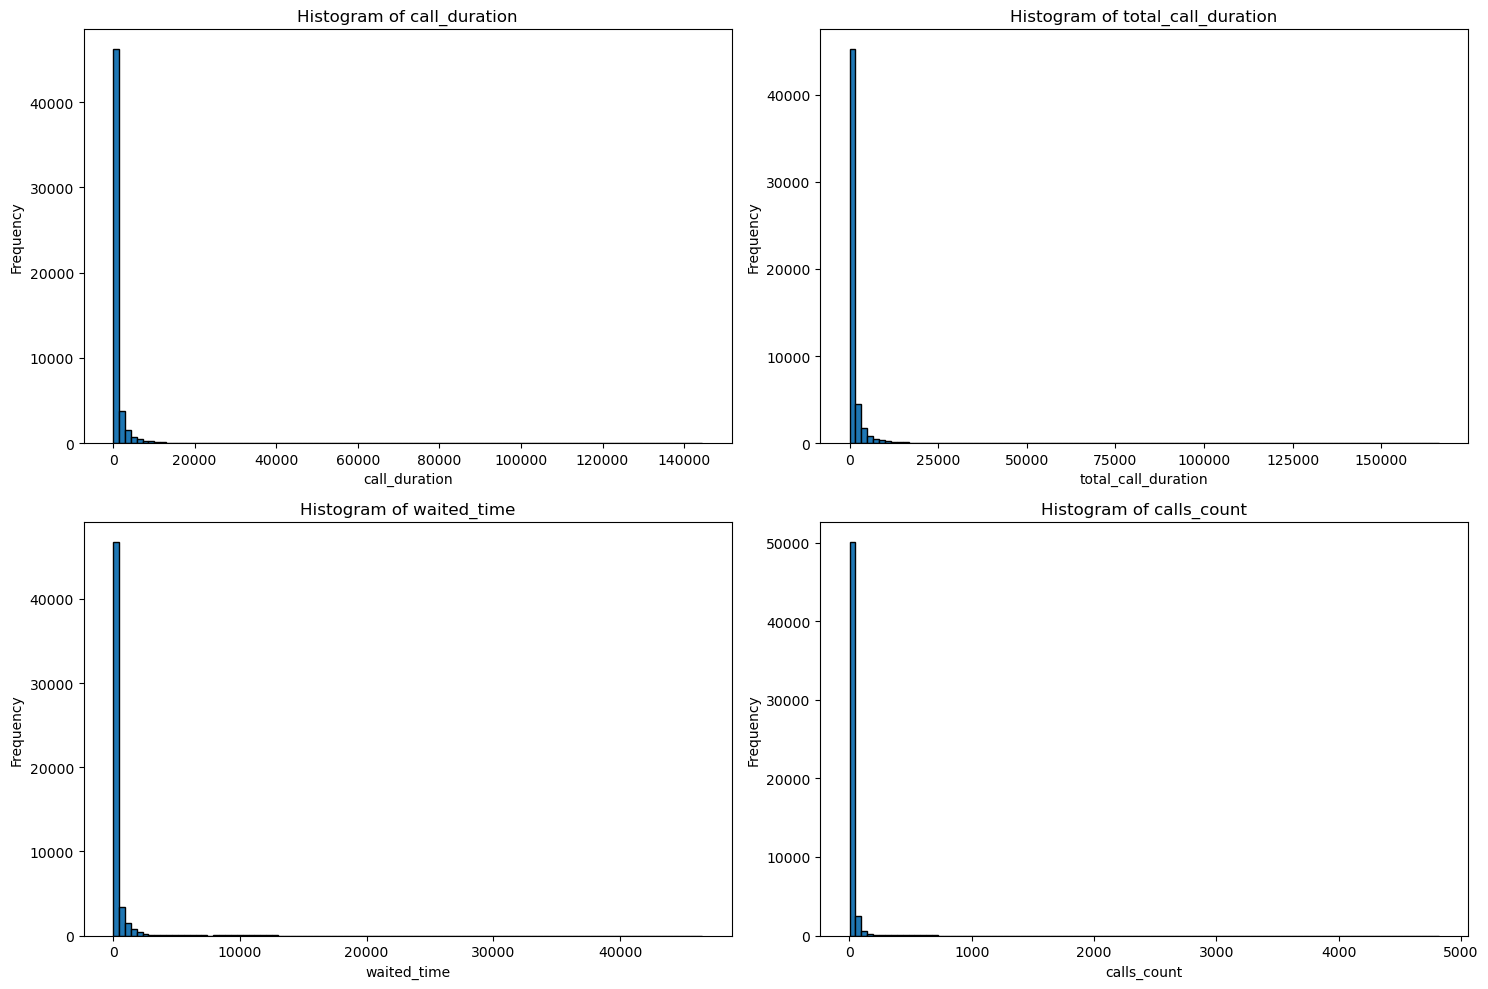

In [46]:
histogramsColumn(telecomCallClean,columnsToWork,100)

We can see that most of the calls happen in the first seconds but we also have extremly high outliers

In [47]:
# we remove the top 5 percent to see how much the data changes 

def remove_top_5Xutliers(df, column,keep):
    threshold = df[column].quantile(keep)
    return df[df[column] <= threshold]

# we apply the columsn to the columns to work 
for column in columnsToWork:
    telecomCallNOTOUTLIERS = remove_top_5Xutliers(telecomCallClean, column,0.95)

# Display the dataframe after removing outliers
display(telecomCallNOTOUTLIERS.sample(10))
quickStatistics(telecomCallNOTOUTLIERS,columnsToWork)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waited_time,tariff_plan,date_start
19622,166983,2019-11-25 00:00:00+03:00,in,False,901880.0,False,26,6507,6628,121,C,2019-08-27
21758,167035,2019-11-26 00:00:00+03:00,in,False,923528.0,True,1,0,48,48,C,2019-08-29
9049,166658,2019-10-14 00:00:00+03:00,out,False,890410.0,False,14,3162,3413,251,B,2019-08-13
46001,168091,2019-11-15 00:00:00+03:00,out,False,958460.0,False,3,337,370,33,B,2019-10-14
18334,166974,2019-10-11 00:00:00+03:00,in,False,900354.0,False,1,36,63,27,C,2019-08-27
33091,167479,2019-11-22 00:00:00+03:00,in,False,nan,True,7,0,66,66,B,2019-09-18
19335,166983,2019-11-02 00:00:00+03:00,out,False,901880.0,True,8,0,102,102,C,2019-08-27
6234,166541,2019-10-03 00:00:00+03:00,in,False,908960.0,False,7,377,567,190,A,2019-08-07
15696,166901,2019-09-23 00:00:00+03:00,out,True,896008.0,False,5,603,650,47,A,2019-08-23
50387,168252,2019-11-13 00:00:00+03:00,in,False,940614.0,False,40,2631,2751,120,A,2019-10-17


'call_duration'

count    51112.000000
mean       537.025415
std       1181.659948
min          0.000000
25%          0.000000
50%         36.000000
75%        514.000000
max      26175.000000
Name: call_duration, dtype: float64

'total_call_duration'

count    51112.000000
mean       683.920195
std       1276.604128
min          0.000000
25%         43.000000
50%        183.000000
75%        719.000000
max      26347.000000
Name: total_call_duration, dtype: float64

'waited_time'

count    51112.000000
mean       146.894780
std        242.346677
min          0.000000
25%         16.000000
50%         49.000000
75%        164.000000
max       3495.000000
Name: waited_time, dtype: float64

'calls_count'

count    51112.000000
mean         8.526765
std         11.711224
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max         62.000000
Name: calls_count, dtype: float64

## lost data 
We had 53785  and after cutting the top 5% we haev 51112 so we lost 2600 data points aproximetely but this should work by removing the outliers 

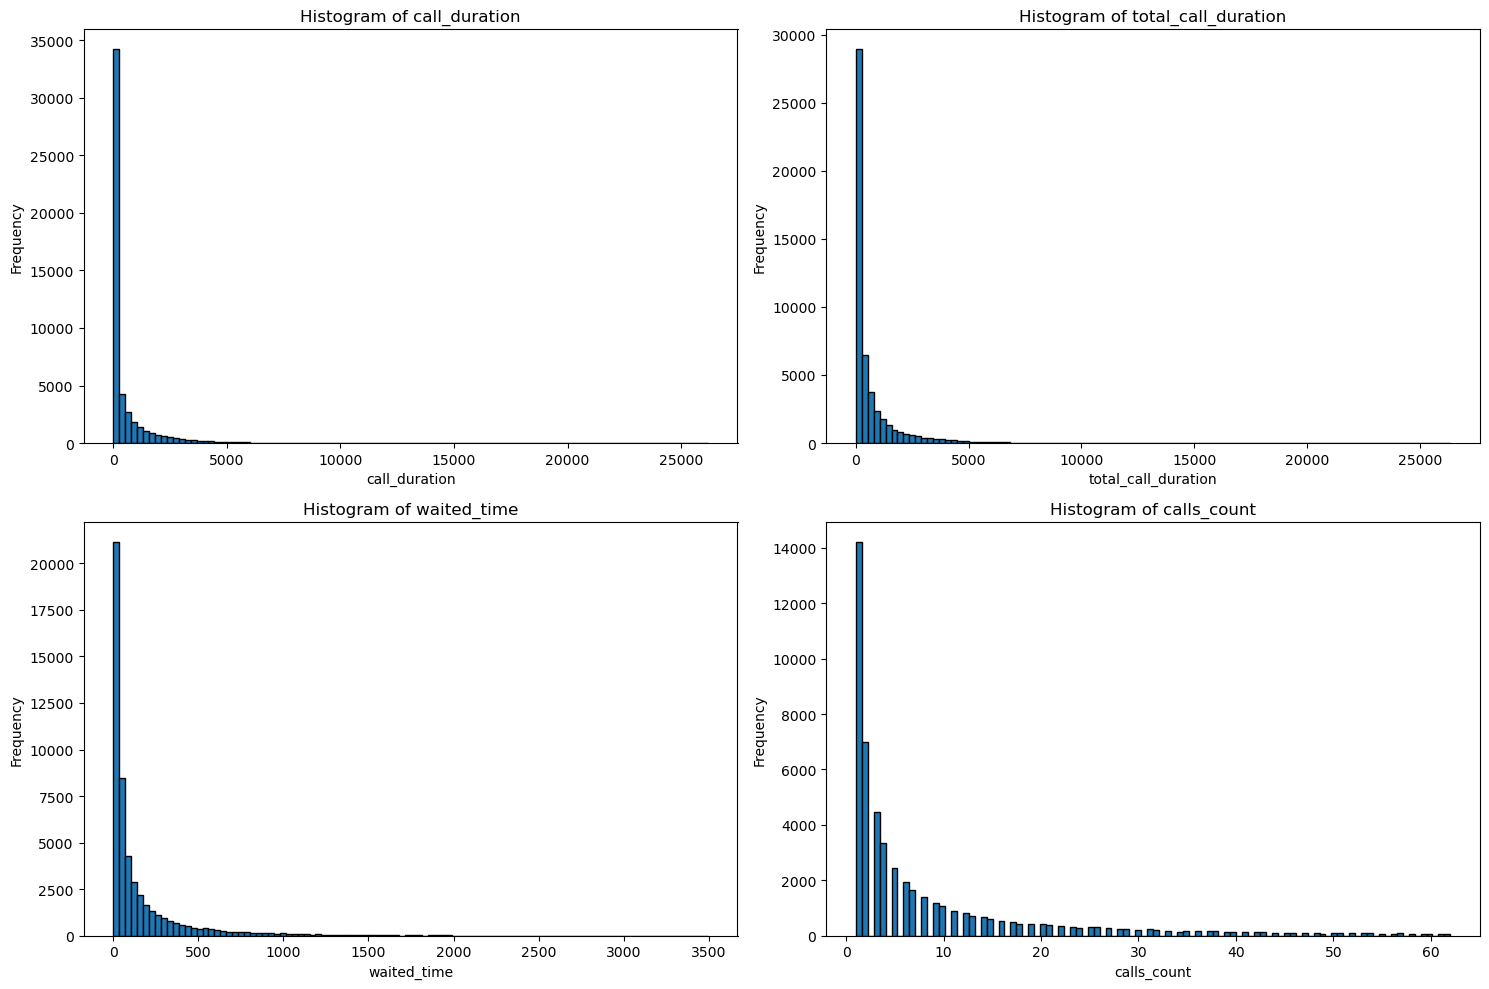

In [48]:
# Create histograms for each column
histogramsColumn(telecomCallNOTOUTLIERS,columnsToWork,100)



after removing the top 5% we can see that the curves become more managable 
Since we are looking for low performers, we are going to first group them by user_id to see if we can group them by groups in that case 



We are going to group based on the operator, in order for this to work we are doing the following operations

values 
'direction" count the number of in and out values for each operator 
"internal" count the number of false and true values 
is_missed_call" count the number of values 
calls_duration: get the mean 
total_call_duration: get the mean 
waited_time: get the mean  duration  

In [49]:
def operatorMeansDF (df):
    OperatorInformation = df.groupby('operator_id').agg({
    'direction': lambda x: x.value_counts().to_dict(),
    'internal': lambda x: x.value_counts().to_dict(),
    'is_missed_call': 'count',
    'call_duration': 'mean',
    'total_call_duration': 'mean',
    'waited_time': 'mean'
}).reset_index()
    return OperatorInformation



In [50]:
AllOperatorInformation = operatorMeansDF(telecomCallNOTOUTLIERS)
    
    
display(AllOperatorInformation.sample(10))

,operator_id,direction,internal,is_missed_call,call_duration,total_call_duration,waited_time
1039,962658.0,"{'out': 47, 'in': 16}","{False: 49, True: 14}",63,696.444444,834.206349,137.761905
136,896018.0,"{'in': 9, 'out': 9}","{False: 11, True: 7}",18,30.111111,49.666667,19.555556
528,924572.0,{'out': 1},{False: 1},1,0.000000,1.000000,1.000000
522,923744.0,{'in': 1},{False: 1},1,55.000000,60.000000,5.000000
617,932246.0,{'out': 1},{False: 1},1,0.000000,60.000000,60.000000
1080,970258.0,{'out': 1},{False: 1},1,0.000000,11.000000,11.000000
990,956080.0,{'in': 3},{False: 3},3,395.666667,479.666667,84.000000
309,908080.0,"{'in': 6, 'out': 1}","{False: 6, True: 1}",7,178.000000,193.428571,15.428571
505,921818.0,"{'out': 139, 'in': 75}","{False: 206, True: 8}",214,1024.261682,1299.850467,275.588785
40,888406.0,"{'in': 7, 'out': 6}",{False: 13},13,56.923077,82.153846,25.230769


In [51]:
#we check for the number of missed calls 
AllOperatorInformation97percent = remove_top_5Xutliers(AllOperatorInformation, 'is_missed_call',0.97)
display(AllOperatorInformation97percent.head(10))
display(AllOperatorInformation['is_missed_call'].describe())
display(AllOperatorInformation97percent['is_missed_call'].describe())

,operator_id,direction,internal,is_missed_call,call_duration,total_call_duration,waited_time
0,879896.0,"{'out': 101, 'in': 23}","{False: 108, True: 16}",124,408.241935,492.798387,84.556452
2,880020.0,"{'out': 14, 'in': 8}","{False: 19, True: 3}",22,104.090909,119.272727,15.181818
3,880022.0,"{'out': 68, 'in': 8}","{False: 68, True: 8}",76,240.842105,298.407895,57.565789
6,880240.0,{'out': 14},"{False: 8, True: 6}",14,275.928571,316.857143,40.928571
7,881278.0,{'out': 8},"{False: 5, True: 3}",8,58.125000,67.875000,9.750000
8,882476.0,{'in': 3},{False: 3},3,64.000000,95.666667,31.666667
9,882478.0,"{'in': 2, 'out': 1}","{True: 2, False: 1}",3,22.666667,50.333333,27.666667
10,882680.0,{'in': 46},"{False: 44, True: 2}",46,136.913043,174.021739,37.108696
11,882684.0,"{'out': 113, 'in': 52}","{False: 162, True: 3}",165,1422.175758,1550.193939,128.018182
13,882688.0,"{'out': 8, 'in': 3}",{False: 11},11,874.818182,1047.909091,173.090909


count    1093.000000
mean       46.763038
std       243.281955
min         1.000000
25%         5.000000
50%        17.000000
75%        52.000000
max      7892.000000
Name: is_missed_call, dtype: float64

count    1060.000000
mean       33.541509
std        39.546666
min         1.000000
25%         5.000000
50%        17.000000
75%        48.000000
max       183.000000
Name: is_missed_call, dtype: float64

We lost 33 operators that had an extremly high number of missed calls. 
The remaining data still has a big deviation but the numbers are closer bound toguether. 



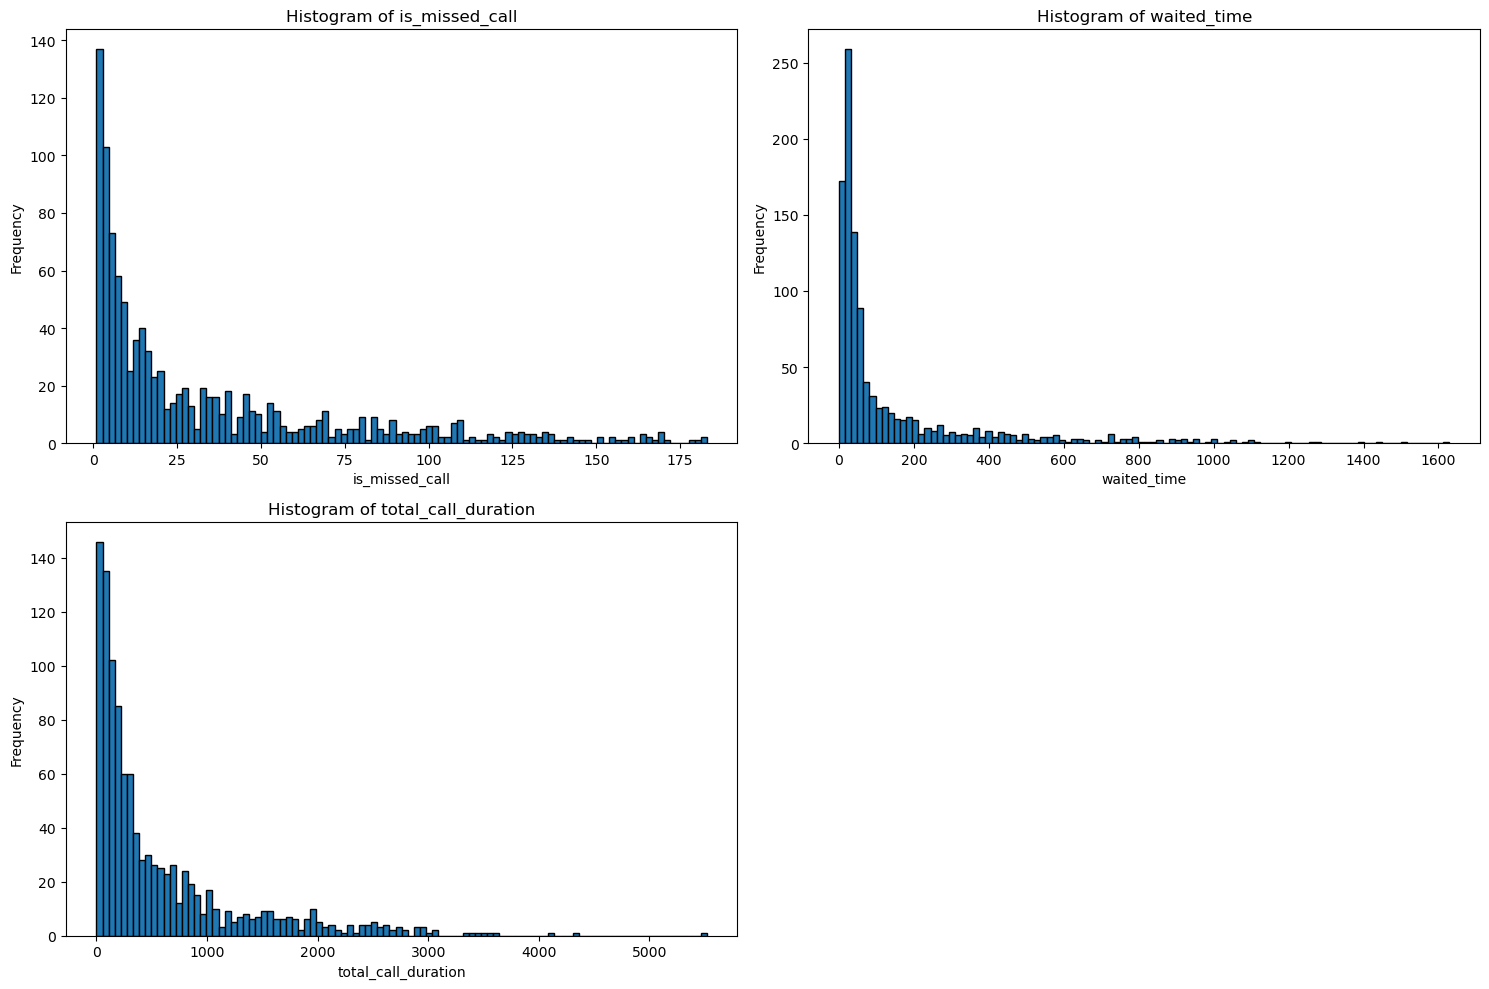

In [52]:
operatorColumns = ['is_missed_call','waited_time','total_call_duration']

histogramsColumn(AllOperatorInformation97percent,operatorColumns,100)

We have stablished the following tresholds for the low performers 


Missed calls: for missed calls, any operator that has 75 or more missed calls is considered a low performer 
Wait time: for the wait time, if they have a wait time of over 600 in 25% or more of their total calls. 
Low number of calls in a day: if they have a low number of calls per day and the calls are short ( under 500 seconds total 

## low performer analysis 

In [53]:

#since we are working with just the operator at this step we are removing the calls that where missed and thus had a nan operator id
telecomNoNan =    telecomCallNOTOUTLIERS[telecomCallNOTOUTLIERS['operator_id'] != 'nan']

In [54]:
#first we get the operators that have a high number of missed calls. 
HighMissCalls = telecomNoNan 
HighMissCalls = HighMissCalls[HighMissCalls['is_missed_call'] == True].groupby('operator_id').size()
HighMissCallsOperators = HighMissCalls[HighMissCalls >= 50].index.tolist()

HighMissCallsOperators = pd.DataFrame(HighMissCallsOperators, columns=['operator_id'])
#HighMissCallsOperators = HighMissCallsOperators.drop(HighMissCallsOperators.index[-1])
NumberOfLowPerformers = len(HighMissCallsOperators)
display(HighMissCallsOperators.sample(5))


,operator_id
53,913942.0
0,879896.0
30,900492.0
25,896016.0
8,885876.0


In [55]:
# now we get the total number of calls each operator made 

total_calls = telecomNoNan.groupby('operator_id')['calls_count'].sum().reset_index(name='total_calls')
#now for each operator we get how many have a wait time of over 500 seconds. 

OperatorWaitCallsOver500 = telecomNoNan[telecomNoNan['waited_time'] >= 500].groupby('operator_id').size().reset_index(name='count_over_500')

#we merge them 
WaitedCalls = pd.merge(OperatorWaitCallsOver500, total_calls, on='operator_id', how='inner')

#WaitedCalls = WaitedCalls.drop(WaitedCalls.index[-1])
WaitedCalls['highWaitTimes']= (WaitedCalls['count_over_500']/WaitedCalls['total_calls'])*100
display(WaitedCalls.describe())

#we seelect all operators that had 29 or more calls with a wait time of over 500 


operatorshighWaitTimes = WaitedCalls[WaitedCalls['count_over_500']>=29]
display(operatorshighWaitTimes.sample(5))

,count_over_500,total_calls,highWaitTimes
count,318.000000,318.000000,318.000000
mean,11.386792,971.726415,1.319653
std,11.637997,876.771431,0.759389
min,1.000000,25.000000,0.041000
25%,3.000000,353.250000,0.637620
50%,7.500000,712.000000,1.397021
75%,15.750000,1301.250000,1.931446
max,62.000000,6211.000000,4.000000


,operator_id,count_over_500,total_calls,highWaitTimes
32,893674.0,38,2067,1.838413
136,919554.0,46,1359,3.384842
7,882690.0,33,1396,2.363897
12,884946.0,32,1427,2.242467
225,940634.0,32,1724,1.856148


In [56]:
#Since high wait times, and high missed calls are the two most important values we merged those data sets. 
#we use an outer merge 
LowPerformingOperators = pd.merge(HighMissCallsOperators, operatorshighWaitTimes, on='operator_id', how='outer')
display(LowPerformingOperators.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   operator_id     85 non-null     object 
 1   count_over_500  30 non-null     float64
 2   total_calls     30 non-null     float64
 3   highWaitTimes   30 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.8+ KB


None

In [57]:
outCallsTotal = telecomCallNOTOUTLIERS[telecomCallNOTOUTLIERS['direction'] == 'out']

# groupby operator and out call count 
outCallsTotalCount = outCallsTotal.groupby('operator_id').size().reset_index(name='out_call_count')

# Display the result
display(outCallsTotalCount.sample(10))
display(outCallsTotalCount.describe())
#we keep only the ones with less than 21 
outCallsTotalOperators= outCallsTotalCount[outCallsTotalCount['out_call_count']<=5]
display(outCallsTotalOperators)

,operator_id,out_call_count
813,958456.0,30
375,919552.0,45
688,945288.0,21
119,897030.0,17
617,940436.0,6
821,958640.0,3
76,891970.0,3
637,940658.0,47
580,937984.0,19
190,904200.0,6


,out_call_count
count,883.000000
mean,33.602492
std,41.315026
min,1.000000
25%,5.000000
50%,16.000000
75%,47.000000
max,246.000000


,operator_id,out_call_count
8,882478.0,1
13,883018.0,1
14,883898.0,1
17,884402.0,3
18,884406.0,4
...,...,...
876,970486.0,4
877,972408.0,3
878,972410.0,4
879,972412.0,4


The data is unclear if all the operators need to be making outgoing calls so we are going to just use the other two as identififers for the analysis but we can come back if needed 

## Low performing operators 

We have isolated the low performing operators, now we are going to separate them in the original data frame in order to analyse them in a vacum and see how they perform. 
Interesting enough, because we isolated the high wait times from the outliers, loosing 


In [58]:
LowOpIds = LowPerformingOperators['operator_id']
LowOpTotalInformation = telecomCallNOTOUTLIERS[telecomCallNOTOUTLIERS['operator_id'].isin(LowOpIds)]
#we also create one without the low performers 
NormalPerformers = telecomCallNOTOUTLIERS[~telecomCallNOTOUTLIERS['operator_id'].isin(LowOpIds)]
# Display the filtered DataFrame
display(LowOpTotalInformation)
display(NormalPerformers)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waited_time,tariff_plan,date_start
14,166377,2019-08-07 00:00:00+03:00,out,False,880028.0,True,1,0,15,15,B,2019-08-01
15,166377,2019-08-07 00:00:00+03:00,out,False,880026.0,False,1,21,28,7,B,2019-08-01
18,166377,2019-08-07 00:00:00+03:00,out,False,880026.0,True,1,0,17,17,B,2019-08-01
21,166377,2019-08-09 00:00:00+03:00,out,False,880028.0,False,17,1603,1725,122,B,2019-08-01
22,166377,2019-08-09 00:00:00+03:00,out,False,880028.0,True,2,0,2,2,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
52997,168361,2019-11-28 00:00:00+03:00,out,False,945296.0,True,30,0,535,535,A,2019-10-23
52998,168361,2019-11-28 00:00:00+03:00,out,False,945324.0,True,18,0,630,630,A,2019-10-23
53012,168361,2019-11-28 00:00:00+03:00,out,False,945290.0,False,44,1356,2477,1121,A,2019-10-23
53018,168361,2019-11-28 00:00:00+03:00,out,False,945290.0,True,47,0,1367,1367,A,2019-10-23


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waited_time,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,nan,True,2,0,4,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,8,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
53780,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38,38,C,2019-10-31
53781,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501,22,C,2019-10-31
53782,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,60,C,2019-10-31
53783,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,60,C,2019-10-31


 now we can repeat the original analysis with this information 
 We have 14537  rows out of a total of 51000 which represents 27 % of the total operations. Since we have isolated this from only 87 operator_ids which represent less than the 10% of the total number of operators it means this operators may be over represented in the data. 



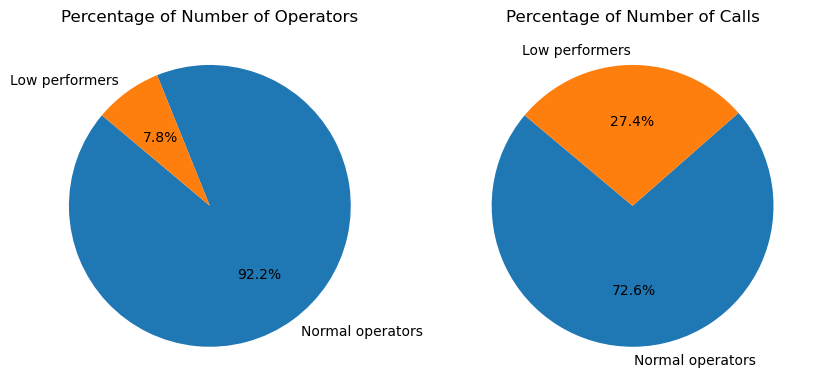

In [59]:
#we graph the number of operators and their percentages. 

OperatorCondensed = {
    'Number of operators': [ NormalPerformers['operator_id'].nunique(),LowOpTotalInformation['operator_id'].nunique()],
    'Number of calls': [len(NormalPerformers), len(LowOpTotalInformation)]
}

OperatorCondensed = pd.DataFrame(OperatorCondensed, index=['Normal operators', 'Low performers'])

labels = OperatorCondensed.index
operators = OperatorCondensed['Number of operators']
calls = OperatorCondensed['Number of calls']

# Create the pie chart for the number of operators
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(operators, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Number of Operators')

# Create the pie chart for the number of calls
plt.subplot(1, 2, 2)
plt.pie(calls, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Number of Calls')

plt.show()





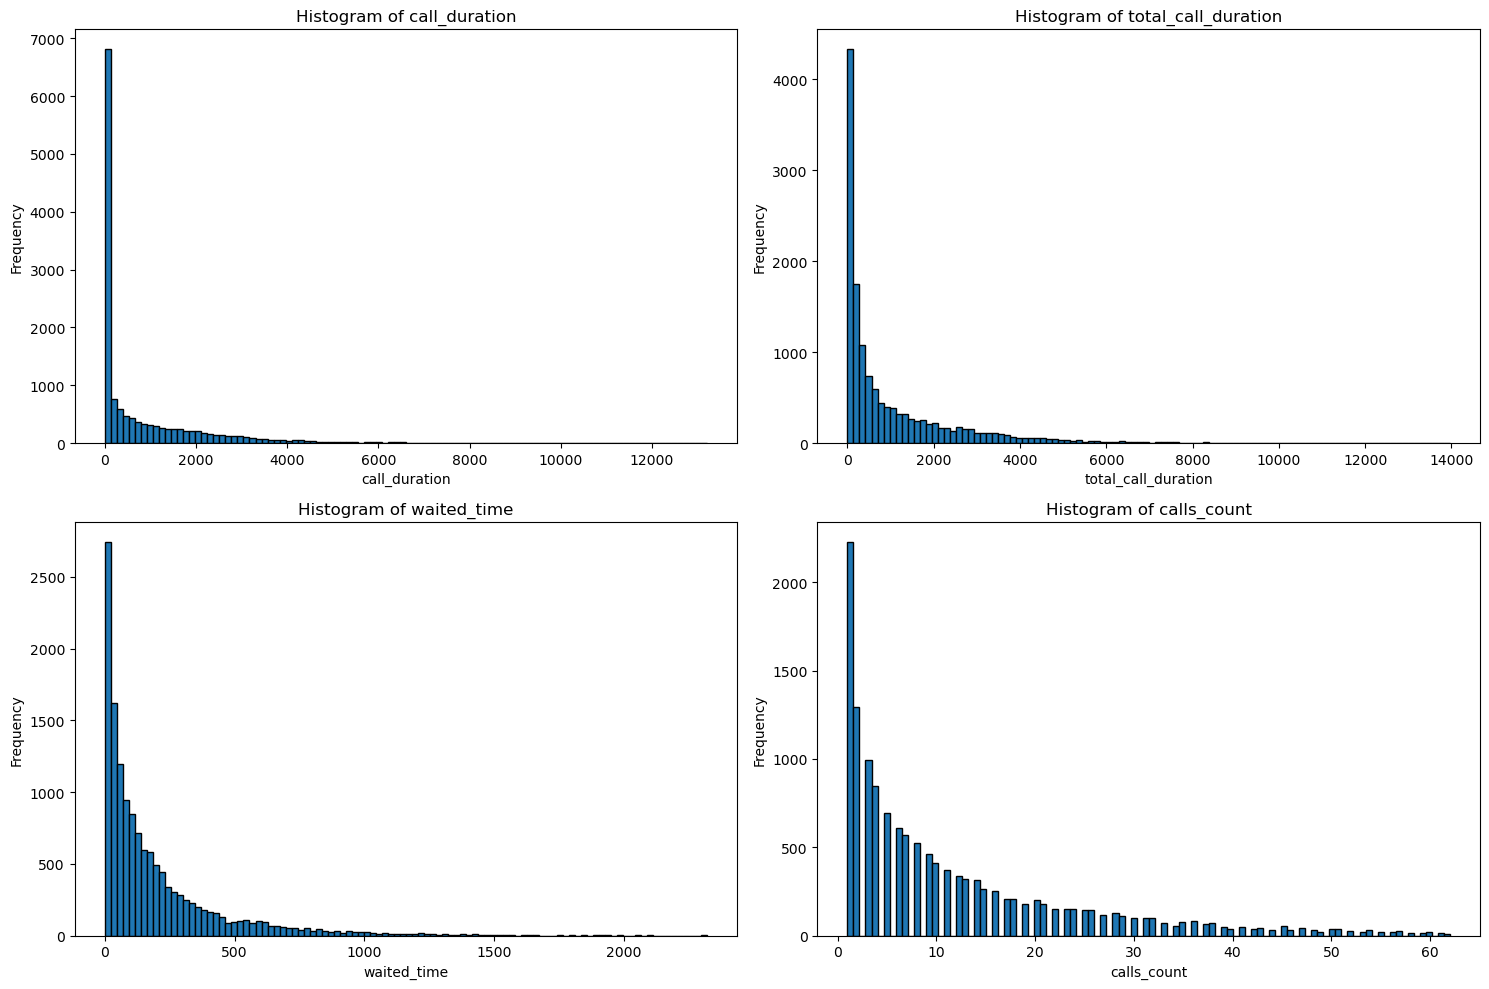

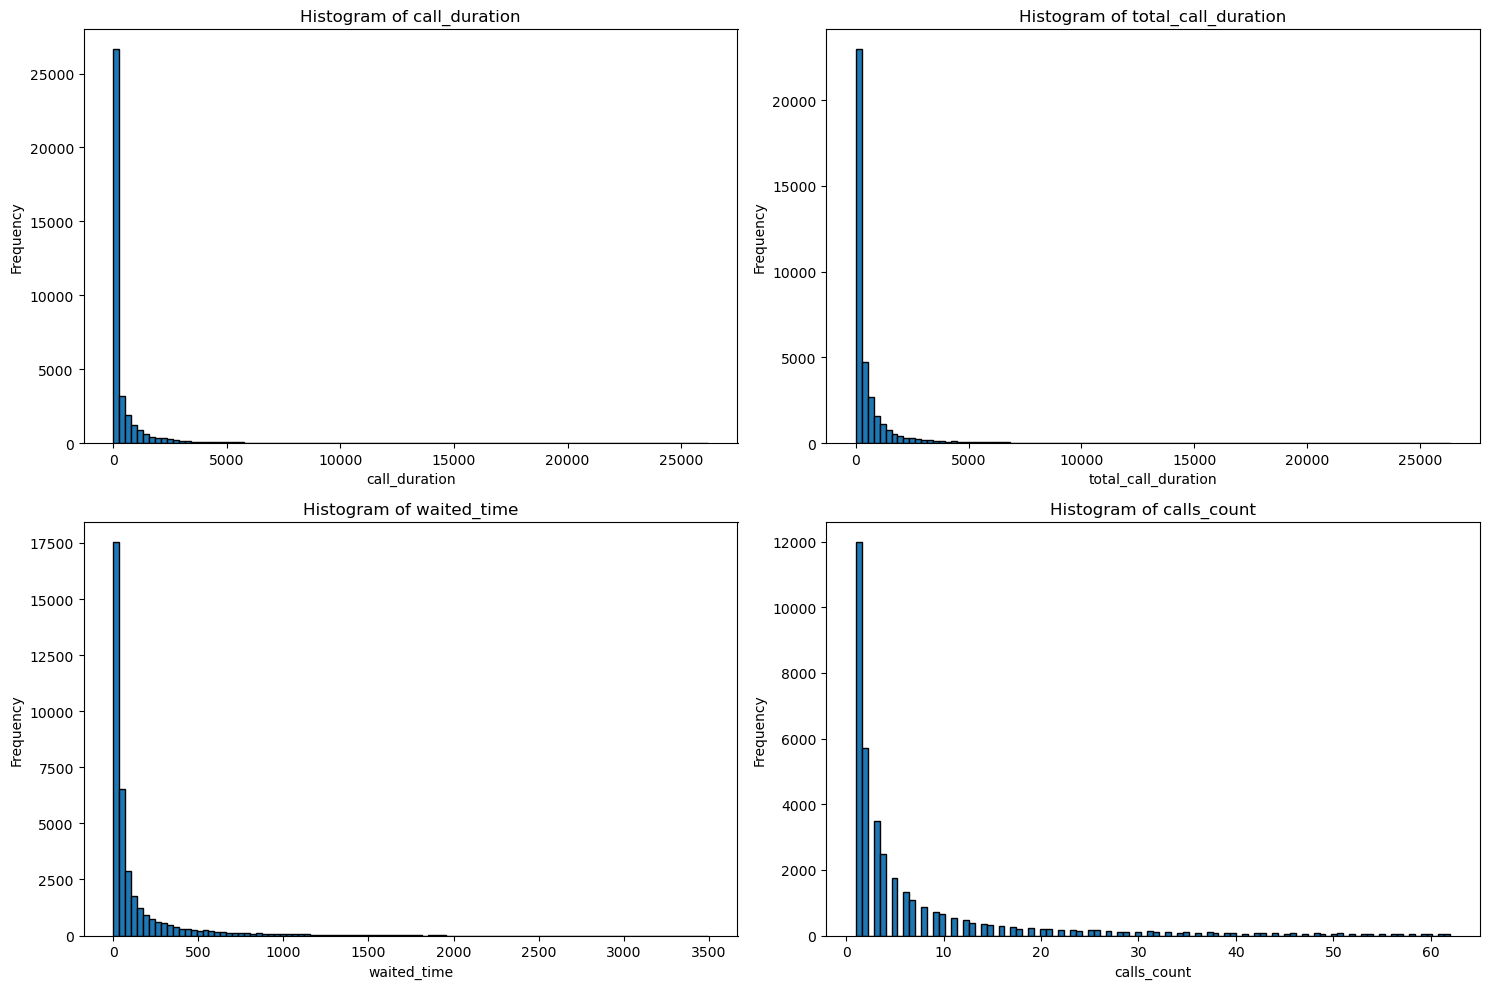

In [60]:
histogramsColumn(LowOpTotalInformation,columnsToWork,100)
histogramsColumn(NormalPerformers,columnsToWork,100)

In [61]:
quickStatistics(LowOpTotalInformation,columnsToWork)
quickStatistics(NormalPerformers,columnsToWork)
LowPerfOperators = operatorMeansDF(LowOpTotalInformation)
display(LowPerfOperators)

'call_duration'

count    14016.000000
mean       854.406678
std       1359.931142
min          0.000000
25%          0.000000
50%        165.000000
75%       1249.000000
max      13215.000000
Name: call_duration, dtype: float64

'total_call_duration'

count    14016.000000
mean      1050.734161
std       1458.951698
min          0.000000
25%         98.000000
50%        395.000000
75%       1471.000000
max      13963.000000
Name: total_call_duration, dtype: float64

'waited_time'

count    14016.000000
mean       196.327483
std        250.777064
min          0.000000
25%         33.000000
50%        106.000000
75%        255.000000
max       2321.000000
Name: waited_time, dtype: float64

'calls_count'

count    14016.000000
mean        11.765126
std         12.530351
min          1.000000
25%          2.000000
50%          7.000000
75%         17.000000
max         62.000000
Name: calls_count, dtype: float64

'call_duration'

count    37096.000000
mean       417.109095
std       1082.927878
min          0.000000
25%          0.000000
50%         21.000000
75%        333.000000
max      26175.000000
Name: call_duration, dtype: float64

'total_call_duration'

count    37096.000000
mean       545.326693
std       1171.004771
min          0.000000
25%         34.000000
50%        135.500000
75%        537.000000
max      26347.000000
Name: total_call_duration, dtype: float64

'waited_time'

count    37096.000000
mean       128.217598
std        236.412148
min          0.000000
25%         13.000000
50%         38.000000
75%        120.000000
max       3495.000000
Name: waited_time, dtype: float64

'calls_count'

count    37096.000000
mean         7.303213
std         11.144269
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         62.000000
Name: calls_count, dtype: float64

,operator_id,direction,internal,is_missed_call,call_duration,total_call_duration,waited_time
0,879896.0,"{'out': 101, 'in': 23}","{False: 108, True: 16}",124,408.241935,492.798387,84.556452
1,879898.0,"{'out': 141, 'in': 63}","{False: 188, True: 16}",204,408.132353,742.598039,334.465686
2,880026.0,"{'out': 179, 'in': 19}","{False: 184, True: 14}",198,856.939394,978.111111,121.171717
3,880028.0,"{'out': 181, 'in': 45}","{False: 218, True: 8}",226,746.265487,956.858407,210.592920
4,882684.0,"{'out': 113, 'in': 52}","{False: 162, True: 3}",165,1422.175758,1550.193939,128.018182
...,...,...,...,...,...,...,...
80,945290.0,{'out': 54},{False: 54},54,883.166667,1982.333333,1099.166667
81,945296.0,{'out': 73},"{False: 72, True: 1}",73,1946.000000,2531.821918,585.821918
82,945316.0,{'out': 50},"{False: 49, True: 1}",50,1945.000000,2549.160000,604.160000
83,945324.0,{'out': 38},"{False: 37, True: 1}",38,1484.842105,2484.763158,999.921053


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Aunque el preprocesamiento de datos es adecuado, sería beneficioso incluir más explicaciones sobre las decisiones tomadas, especialmente en el manejo de valores atípicos y datos faltantes.
</div>

## pre hypothesis 

So far we know that roughly 10% of the performers are low performers, but also that they have nearly 25% of all calls. Since we are at the limit on how to evaluate them we need to turn to the other factor in the data that is the users that make the calls 

We have the user_id that made each call, as well as the tariff plan and the date_start. 
There are three potential hypothesis that we can infer from the information we have. 
We need to check if the behaviour is consistent through the months. since we have four months worth of data, we need to see how does each operator id behaves
We also need to check the following hypothesis 

A. Are there any user_id present in all the low performers? If yes, is the user present with the other operators 
B. Are all the calls from a different plan or from the same plan? 
C. Does the start date affects the call interactions? 


In [62]:
display(telecomClientRaw.sample(10))
display(LowOpTotalInformation)

,user_id,tariff_plan,date_start
596,167447,B,2019-09-17
313,167210,C,2019-09-06
463,167129,C,2019-09-03
496,167419,B,2019-09-16
590,166532,B,2019-08-07
504,168562,B,2019-10-30
232,167927,C,2019-10-07
307,167277,C,2019-09-10
704,167813,B,2019-10-01
278,166874,C,2019-08-22


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waited_time,tariff_plan,date_start
14,166377,2019-08-07 00:00:00+03:00,out,False,880028.0,True,1,0,15,15,B,2019-08-01
15,166377,2019-08-07 00:00:00+03:00,out,False,880026.0,False,1,21,28,7,B,2019-08-01
18,166377,2019-08-07 00:00:00+03:00,out,False,880026.0,True,1,0,17,17,B,2019-08-01
21,166377,2019-08-09 00:00:00+03:00,out,False,880028.0,False,17,1603,1725,122,B,2019-08-01
22,166377,2019-08-09 00:00:00+03:00,out,False,880028.0,True,2,0,2,2,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
52997,168361,2019-11-28 00:00:00+03:00,out,False,945296.0,True,30,0,535,535,A,2019-10-23
52998,168361,2019-11-28 00:00:00+03:00,out,False,945324.0,True,18,0,630,630,A,2019-10-23
53012,168361,2019-11-28 00:00:00+03:00,out,False,945290.0,False,44,1356,2477,1121,A,2019-10-23
53018,168361,2019-11-28 00:00:00+03:00,out,False,945290.0,True,47,0,1367,1367,A,2019-10-23


In [63]:
monthly_statsLow = LowOpTotalInformation.groupby(LowOpTotalInformation['date'].dt.to_period('M')).agg({
    'call_duration': 'mean',
    'calls_count': 'sum',
    'total_call_duration': 'mean'
}).reset_index()

# Convert period to datetime for better readability
monthly_statsLow['date'] = monthly_statsLow['date'].dt.to_timestamp()

display(monthly_statsLow)


monthly_statsNorm = NormalPerformers.groupby(NormalPerformers['date'].dt.to_period('M')).agg({
    'call_duration': 'mean',
    'calls_count': 'sum',
    'total_call_duration': 'mean'
}).reset_index()

# Convert period to datetime for better readability
monthly_statsNorm['date'] = monthly_statsNorm['date'].dt.to_timestamp()

display(monthly_statsNorm)

C:\Users\aguzm\AppData\Local\Temp\ipykernel_39776\3676713643.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_statsLow = LowOpTotalInformation.groupby(LowOpTotalInformation['date'].dt.to_period('M')).agg({


,date,call_duration,calls_count,total_call_duration
0,2019-08-01,933.792547,7668,1077.219876
1,2019-09-01,835.083947,31301,993.264659
2,2019-10-01,805.103571,62524,1002.771241
3,2019-11-01,908.640042,63407,1137.359748


C:\Users\aguzm\AppData\Local\Temp\ipykernel_39776\3676713643.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_statsNorm = NormalPerformers.groupby(NormalPerformers['date'].dt.to_period('M')).agg({


,date,call_duration,calls_count,total_call_duration
0,2019-08-01,266.628801,7753,364.076029
1,2019-09-01,398.976056,37082,517.144014
2,2019-10-01,376.295886,83976,501.983767
3,2019-11-01,460.747059,142109,595.851798


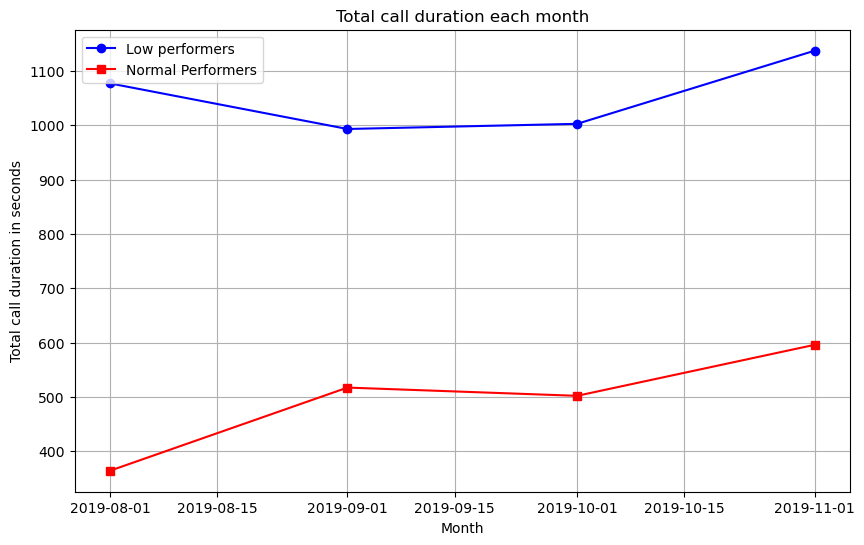

In [64]:
plt.figure(figsize=(10, 6))


plt.plot(monthly_statsLow['date'], monthly_statsLow['total_call_duration'], marker='o', label='Low performers', color='blue')


plt.plot(monthly_statsNorm['date'], monthly_statsNorm['total_call_duration'], marker='s', label='Normal Performers', color='red')

plt.title('Total call duration each month')
plt.xlabel('Month')
plt.ylabel('Total call duration in seconds')

plt.legend()  # Add a legend to differentiate the two DataFrames
plt.grid(True)

plt.show()

by month the data seems consistent, with a dipo in the last month. now that we have that out of the line we can hypothesis based on the users 

In [65]:
display(LowOpTotalInformation)
display(NormalPerformers)

#NormalPerformers

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waited_time,tariff_plan,date_start
14,166377,2019-08-07 00:00:00+03:00,out,False,880028.0,True,1,0,15,15,B,2019-08-01
15,166377,2019-08-07 00:00:00+03:00,out,False,880026.0,False,1,21,28,7,B,2019-08-01
18,166377,2019-08-07 00:00:00+03:00,out,False,880026.0,True,1,0,17,17,B,2019-08-01
21,166377,2019-08-09 00:00:00+03:00,out,False,880028.0,False,17,1603,1725,122,B,2019-08-01
22,166377,2019-08-09 00:00:00+03:00,out,False,880028.0,True,2,0,2,2,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
52997,168361,2019-11-28 00:00:00+03:00,out,False,945296.0,True,30,0,535,535,A,2019-10-23
52998,168361,2019-11-28 00:00:00+03:00,out,False,945324.0,True,18,0,630,630,A,2019-10-23
53012,168361,2019-11-28 00:00:00+03:00,out,False,945290.0,False,44,1356,2477,1121,A,2019-10-23
53018,168361,2019-11-28 00:00:00+03:00,out,False,945290.0,True,47,0,1367,1367,A,2019-10-23


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waited_time,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,nan,True,2,0,4,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,8,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
53780,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38,38,C,2019-10-31
53781,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501,22,C,2019-10-31
53782,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,60,C,2019-10-31
53783,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,60,C,2019-10-31


In [66]:
user_statsNormal = NormalPerformers.groupby('user_id').agg({
    'total_call_duration': 'mean',  
    'call_duration': 'mean'
}).rename(columns={
    'total_call_duration': 'avg_wait_time',
    'call_duration': 'avg_call_time'
})

display(user_statsNormal.head())
display(user_statsNormal.describe())



,avg_wait_time,avg_call_time
user_id,,
166377,186.102041,143.258503
166391,46.450000,13.000000
166392,220.476636,181.719626
166399,36.956522,11.434783
166405,915.329298,663.760291


,avg_wait_time,avg_call_time
count,307.000000,307.000000
mean,307.081483,232.138408
std,439.729277,384.442606
min,0.000000,0.000000
25%,58.526099,27.307994
50%,172.600000,129.463415
75%,392.326534,298.529412
max,4767.818182,4747.454545


In [67]:
# Step 1: Count occurrences of each user_id
user_id_counts = LowOpTotalInformation['user_id'].value_counts()

# Step 2: Calculate average wait time and average call time for each user_id
user_statsLowPer = LowOpTotalInformation.groupby('user_id').agg({
    'total_call_duration': 'mean',  # Assuming this includes waiting time
    'call_duration': 'mean'
}).rename(columns={
    'total_call_duration': 'avg_wait_time',
    'call_duration': 'avg_call_time'
})
display(user_statsLowPer.head())
display(user_statsLowPer.describe())


,avg_wait_time,avg_call_time
user_id,,
166377,966.783019,797.948113
166405,1566.763793,1312.365517
166406,648.161585,408.173780
166485,910.370229,720.059160
166495,1098.929412,914.994118


,avg_wait_time,avg_call_time
count,50.000000,50.000000
mean,1048.056208,813.284881
std,571.249478,442.174499
min,160.150943,120.336283
25%,631.349548,413.584821
50%,970.383817,707.391543
75%,1296.899615,1047.610388
max,2487.825688,2030.706422


In [68]:
#we now count how many times certain users appear in each dataframe, and select the top20 to see if there is any pattern 


user_id_countsNorm = NormalPerformers['user_id'].value_counts()

# Get the top 20 user_ids
top_20_user_idsNorm = user_id_countsNorm.head(20)

display(top_20_user_idsNorm)

user_id_countsLow = LowOpTotalInformation['user_id'].value_counts()

# Get the top 20 user_ids
top_20_user_idsLow = user_id_countsLow.head(20)
display(top_20_user_idsLow)

user_id
168187    2470
167497    1295
168062    1087
167109     848
167445     791
166916     753
166658     751
167176     748
168252     732
167626     655
167977     574
168091     525
168361     492
166407     485
167828     452
167359     445
166541     429
166405     413
167888     410
167125     406
Name: count, dtype: int64

user_id
166658    1354
167150    1044
166983     854
166511     777
166782     673
166405     580
166916     551
166485     524
166377     424
166406     328
167175     272
167650     272
166691     262
166678     261
167071     253
166833     243
166708     224
168361     215
166725     215
167466     214
Name: count, dtype: int64

We can see some users made over 1000 calls but the average is at 200 calls for the normal performers and at 400 for the low performers 

Hypothesis 1 

 For the first hypothesis " Low performers and Normal performers calls are from different tariff plans. "
 
 the null and alternative hypothesis are the next ones: Null hypothesis: The tariff plans of the users of the low performers and the normals performers is the same" 
 Alternative hypothesis: The tariff plans of the users of the low performers and the normals performers is different 

We are assuming an alfa of 0.05

Steps to follow:

Isolate the data to do the test. 
Graph and a chhi square test 





In [69]:


# Grouping LowOpTotalInformation by operator_id and tariff_plan and counting occurrences
low_op_tariff_counts = LowOpTotalInformation.groupby(['operator_id', 'tariff_plan']).size().unstack(fill_value=0)

# Grouping NormalPerformers by operator_id and tariff_plan and counting occurrences
normal_op_tariff_counts = NormalPerformers.groupby(['operator_id', 'tariff_plan']).size().unstack(fill_value=0)
combined_tariff_counts = pd.concat([low_op_tariff_counts, normal_op_tariff_counts], keys=['Low Performers', 'Normal Performers']).fillna(0)

display(combined_tariff_counts.sample(10))


tariff_plan                      A   B   C
                  operator_id             
Normal Performers 945046.0       0  22   0
                  929622.0       0   0  13
                  945902.0       0  14   0
                  905478.0       0   1   0
                  959596.0       0   2   0
                  919456.0      21   0   0
                  904284.0       0   0  31
                  919162.0       3   0   0
                  906394.0     134   0   0
                  905870.0       0  81   0

In [70]:
#we isolate the data from the tarif plans in order to analyze it 

TarifDataLow = low_op_tariff_counts.sum()
display (TarifDataLow)

TarifDataNorm =normal_op_tariff_counts.sum()
display (TarifDataNorm)

tariff_plan
A    1851
B    5895
C    6270
dtype: int64

tariff_plan
A    11135
B    12616
C    13345
dtype: int64

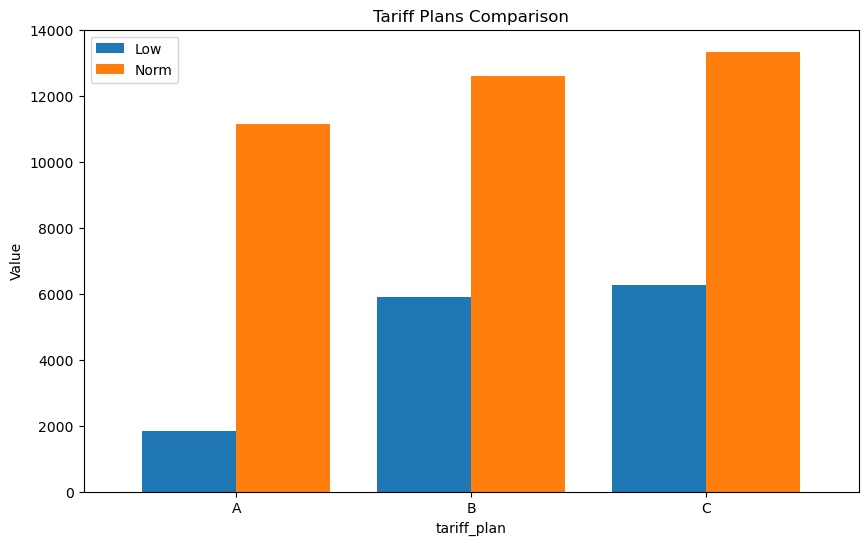

In [71]:
# we graph it to visualize it. 

tarif= pd.DataFrame({
    'Low': TarifDataLow,
    'Norm': TarifDataNorm
})

# Plotting
ax = tarif.plot(kind='bar', figsize=(10, 6), width=0.8)

# Adding labels and title
ax.set_ylabel('Value')
ax.set_title('Tariff Plans Comparison')
plt.xticks(rotation=0)

# Show plot
plt.show()

from the graph we can see that the B and C plan proportion are different in the low performer than the normal performers 

In [72]:
chi2, p, dof, expected = chi2_contingency(combined_tariff_counts)

# Display the results
display (f"Chi-Square Statistic: {chi2}")
display(f"P-value: {p}")
display(f"Degrees of Freedom: {dof}")
display("Expected Frequencies Table:")
display(expected)

# Interpretation
if p < 0.05:
    display("Reject the null hypothesis: The tariff plans are different between low performers and normal performers.")
else:
    display("Fail to reject the null hypothesis: There is no significant difference in tariff plans between low performers and normal performers.")

'Chi-Square Statistic: 87724.90915913075'

'P-value: 0.0'

'Degrees of Freedom: 2184'

'Expected Frequencies Table:'

array([[3.15046173e+01, 4.49085146e+01, 4.75868681e+01],
       [5.18301769e+01, 7.38817499e+01, 7.82880733e+01],
       [5.03057599e+01, 7.17087572e+01, 7.59854829e+01],
       ...,
       [5.08138989e-01, 7.24330881e-01, 7.67530130e-01],
       [2.54069494e-01, 3.62165441e-01, 3.83765065e-01],
       [2.00511645e+03, 2.85820966e+03, 3.02867389e+03]])

'Reject the null hypothesis: The tariff plans are different between low performers and normal performers.'

## explicacion 

The results of the chi square indicate that th tarif plan difference is statistically significant. 

# 2 hypothesis 

The second hypothesis is that the start date of the users also affect the low performers, with certain date enabling more problematic users that leads to low performance. 


he null and alternative hypothesis are the next ones: Null hypothesis: The start_date of the users of the low performers and the normals performers is the same" 
 Alternative hypothesis: The start_date  of the users of the low performers and the normals performers is different 
 

We are assuming an alfa of 0.05

Steps to follow:

Isolate the data to do the test. 
Graph and an anova test 

In [73]:

# Extract the week of the year from 'date_start'
LowOpTotalInformation['start_week'] = LowOpTotalInformation['date_start'].dt.isocalendar().week
NormalPerformers['start_week'] = NormalPerformers['date_start'].dt.isocalendar().week
display (NormalPerformers.head())
# Extract the week data for the Mann-Whitney U test
low_performers_weeks =LowOpTotalInformation.groupby('start_week')['user_id'].nunique()
display (low_performers_weeks)

normal_performers_weeks =NormalPerformers.groupby('start_week')['user_id'].nunique()
display (normal_performers_weeks)

C:\Users\aguzm\AppData\Local\Temp\ipykernel_39776\3040587554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LowOpTotalInformation['start_week'] = LowOpTotalInformation['date_start'].dt.isocalendar().week
C:\Users\aguzm\AppData\Local\Temp\ipykernel_39776\3040587554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NormalPerformers['start_week'] = NormalPerformers['date_start'].dt.isocalendar().week


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waited_time,tariff_plan,date_start,start_week
0,166377,2019-08-04 00:00:00+03:00,in,False,nan,True,2,0,4,4,B,2019-08-01,31
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5,B,2019-08-01,31
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1,B,2019-08-01,31
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,8,B,2019-08-01,31
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25,B,2019-08-01,31


start_week
31    3
32    6
33    5
34    6
35    7
36    4
37    3
38    5
39    5
40    1
41    1
42    3
43    1
Name: user_id, dtype: int64

start_week
31     8
32    17
33    25
34    19
35    34
36    26
37    18
38    26
39    23
40    17
41    38
42    25
43    15
44    16
Name: user_id, dtype: int64

,start_week,TimesCalled,Proportion
0,31,1332,9.503425
1,32,1938,13.827055
2,33,2316,16.523973
3,34,1917,13.677226
4,35,1979,14.119578
5,36,1529,10.908961
6,37,613,4.373573
7,38,824,5.878995
8,39,784,5.593607
9,40,186,1.327055


,start_week,TimesCalled,Proportion
0,31,1368,3.687729
1,32,2195,5.917080
2,33,2995,8.073647
3,34,2749,7.410502
4,35,4095,11.038926
5,36,4015,10.823269
6,37,1210,3.261807
7,38,4314,11.629286
8,39,2158,5.817339
9,40,1694,4.566530


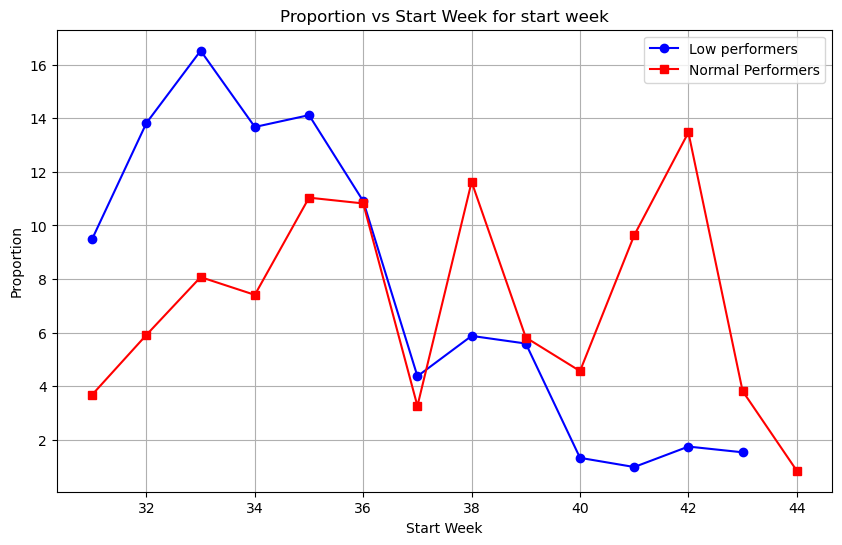

In [74]:
TimesCalledPerStartWeekLow = LowOpTotalInformation.groupby('start_week').size().reset_index(name='TimesCalled')
TimesCalledPerStartWeekNor = NormalPerformers.groupby('start_week').size().reset_index(name='TimesCalled')
TimesCalledPerStartWeekLow['Proportion'] = (TimesCalledPerStartWeekLow['TimesCalled']/(TimesCalledPerStartWeekLow['TimesCalled'].sum()))*100
TimesCalledPerStartWeekNor['Proportion'] = (TimesCalledPerStartWeekNor['TimesCalled']/(TimesCalledPerStartWeekNor['TimesCalled'].sum()))*100

display(TimesCalledPerStartWeekLow)
display(TimesCalledPerStartWeekNor)


plt.figure(figsize=(10, 6))


plt.plot(TimesCalledPerStartWeekLow['start_week'], TimesCalledPerStartWeekLow['Proportion'], marker='o', label='Low performers', color='blue')


plt.plot(TimesCalledPerStartWeekNor['start_week'], TimesCalledPerStartWeekNor['Proportion'], marker='s', label='Normal Performers', color='red')

plt.title('Proportion vs Start Week for start week')
plt.xlabel('Start Week')
plt.ylabel('Proportion')

plt.legend()  # Add a legend to differentiate the two DataFrames
plt.grid(True)

plt.show()

In [75]:

# Perform the ANOVA test
stat, p_value = f_oneway(TimesCalledPerStartWeekLow['Proportion'], TimesCalledPerStartWeekNor['Proportion'])

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in proportions across the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in proportions across the groups.")

Statistic: 0.08964413706709529
P-value: 0.7671051155113577
Fail to reject the null hypothesis: There is no significant difference in proportions across the groups.


In [76]:
stat, p_value = mannwhitneyu(TimesCalledPerStartWeekLow['Proportion'], TimesCalledPerStartWeekNor['Proportion'])

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The times each section called  of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: The  times each section called of the two groups are not significantly different.")

Statistic: 95.0
P-value: 0.865134745405447
Fail to reject the null hypothesis: The  times each section called of the two groups are not significantly different.


## Anova test 

the anova test shows that there is no correlation between the two groups. 

# 

# Conclusions 
🔍 Key findings : The low performers have an anormally long wait time but behave similar to the other operators. The lowperformers despite being less than 8% of the total operators handle the 27% of the total incoming calls which is correlated on the type of users. 

The key difference is that the member in tarif plan B or C have a higher prevalence in the operators that are classified as low performance. 

| 🤔 Impact of personal choices : In this project we choose the thresholds to define the low performers based on the graphs generated and removing the extreme outliers. If there are other elements needed to classify someone as low performer they weren't considered  

🚀 Limitations :

The study had the limitation of the available data. The following data could help improve the analysis 
	
1.The time of the call. We can see if the operators had any relationship with the time they take the calls, such as early morning calls. 
 2.More information on the type of call, the dataset presents all information as equal but a failed service call is different than a sales call, or a payment call. 
3.If the user had called before in the datetime it can help know if it happened in the same day and another operator took the call. The order of the calls could help elucidate the reason for the low performers.
4. Date of contract for the operators, the experience the operators have could also impact their ability to solve the calls in a quickly and efficient manner. 


📝 final coments:

The low performers have a higher rate of interaction with those in B and C tarif plans, there are some outliers in the number of calls a certain users makes but most call at around 200 times in the 4 months of the study while the ones engaged with the low performing operator had a median of 400 calls. 